# REPORT: Image Old-Style Transfer

**_Nguyen Thanh Danh - 17520324_** <br>
**_Phan Nguyen - 17520828_** <br>
**_KHTN2017_** <br>
**_Multi-media Computing Project_** <br>

# 1. Import Libraries

In [20]:
from PIL import Image as IM
import random
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog

# 2. Main Source 

In [23]:
# this filter is to reduce the appearance of blue color and increase those of red and green, for the image looks like older
VINTAGE_COLOR_LEVELS = {
    'r': [0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 17, 18, 19, 19, 20, 21, 22, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 47, 48, 49, 52, 54, 55, 57, 59, 60, 62, 65, 67, 69, 70, 72, 74, 77, 79, 81, 83, 86, 88, 90, 92, 94, 97, 99, 101, 103, 107, 109, 111, 112, 116, 118, 120, 124, 126, 127, 129, 133, 135, 136, 140, 142, 143, 145, 149, 150, 152, 155, 157, 159, 162, 163, 165, 167, 170, 171, 173, 176, 177, 178, 180, 183, 184, 185, 188, 189, 190, 192, 194, 195, 196, 198, 200, 201, 202, 203, 204, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 219, 220, 221, 222, 223, 224, 225, 226, 227, 227, 228, 229, 229, 230, 231, 232, 232, 233, 234, 234, 235, 236, 236, 237, 238, 238, 239, 239, 240, 241, 241, 242, 242, 243, 244, 244, 245, 245, 245, 246, 247, 247, 248, 248, 249, 249, 249, 250, 251, 251, 252, 252, 252, 253, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    'g' : [0, 0, 1, 2, 2, 3, 5, 5, 6, 7, 8, 8, 10, 11, 11, 12, 13, 15, 15, 16, 17, 18, 18, 19, 21, 22, 22, 23, 24, 26, 26, 27, 28, 29, 31, 31, 32, 33, 34, 35, 35, 37, 38, 39, 40, 41, 43, 44, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 126, 127, 128, 129, 131, 132, 133, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 148, 149, 150, 151, 153, 154, 155, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 186, 186, 187, 188, 189, 190, 192, 193, 194, 195, 195, 196, 197, 199, 200, 201, 202, 202, 203, 204, 205, 206, 207, 208, 208, 209, 210, 211, 212, 213, 214, 214, 215, 216, 217, 218, 219, 219, 220, 221, 222, 223, 223, 224, 225, 226, 226, 227, 228, 228, 229, 230, 231, 232, 232, 232, 233, 234, 235, 235, 236, 236, 237, 238, 238, 239, 239, 240, 240, 241, 242, 242, 242, 243, 244, 245, 245, 246, 246, 247, 247, 248, 249, 249, 249, 250, 251, 251, 252, 252, 252, 253, 254, 255],
    'b' : [53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 61, 61, 61, 62, 62, 63, 63, 63, 64, 65, 65, 65, 66, 66, 67, 67, 67, 68, 69, 69, 69, 70, 70, 71, 71, 72, 73, 73, 73, 74, 74, 75, 75, 76, 77, 77, 78, 78, 79, 79, 80, 81, 81, 82, 82, 83, 83, 84, 85, 85, 86, 86, 87, 87, 88, 89, 89, 90, 90, 91, 91, 93, 93, 94, 94, 95, 95, 96, 97, 98, 98, 99, 99, 100, 101, 102, 102, 103, 104, 105, 105, 106, 106, 107, 108, 109, 109, 110, 111, 111, 112, 113, 114, 114, 115, 116, 117, 117, 118, 119, 119, 121, 121, 122, 122, 123, 124, 125, 126, 126, 127, 128, 129, 129, 130, 131, 132, 132, 133, 134, 134, 135, 136, 137, 137, 138, 139, 140, 140, 141, 142, 142, 143, 144, 145, 145, 146, 146, 148, 148, 149, 149, 150, 151, 152, 152, 153, 153, 154, 155, 156, 156, 157, 157, 158, 159, 160, 160, 161, 161, 162, 162, 163, 164, 164, 165, 165, 166, 166, 167, 168, 168, 169, 169, 170, 170, 171, 172, 172, 173, 173, 174, 174, 175, 176, 176, 177, 177, 177, 178, 178, 179, 180, 180, 181, 181, 181, 182, 182, 183, 184, 184, 184, 185, 185, 186, 186, 186, 187, 188, 188, 188, 189, 189, 189, 190, 190, 191, 191, 192, 192, 193, 193, 193, 194, 194, 194, 195, 196, 196, 196, 197, 197, 197, 198, 199]
    }
# apply changes to all pixels of the image
def modify_all_pixels(im, adjust_levels):
    width, height = im.size # take sizes of the image
    pxls = im.load() # load value of pixels
    for x in range(width):
        for y in range(height):
            # at pixel [x,y] we have 3 values of each color channel, one by one is red - green - blue
            # adjust_levels fuction get 5 parameters and return 3 values corresponding to r-g-b at pixel[x, y]
            pxls[x, y] = adjust_levels(x, y, pxls[x, y][0], pxls[x, y][1], pxls[x, y][2])

# apply color_map to transfer image to vintage style
def vintage_colors(im,color_map=VINTAGE_COLOR_LEVELS):
    r_map = color_map['r']
    g_map = color_map['g']
    b_map = color_map['b']
    def adjust_levels(x, y, r, g, b):
        return r_map[r], g_map[g], b_map[b] # return values of r-g-b from color map
    modify_all_pixels(im, adjust_levels) # update all pixels with values from the color map
    return im

# add noise randomly
def add_noise(im, noise_level=50):
    def pixel_noise(x, y, r, g, b):
        noise = random.randint(0, noise_level) - noise_level//2 # noise generation
        return max(0, min(r + noise, 255)), max(0, min(g + noise, 255)), max(0, min(b + noise, 255))
    modify_all_pixels(im, pixel_noise) # update all pixels after generating noise
    return im

def add_scratch(im):
    test_vintage = np.array(im) #convert pil image to matrix format preparing for cv2 format cvt 
    scratch_ = cv2.imread('scratch.jpg') #335 x 507
    scratch = cv2.resize(scratch_, (test_vintage.shape[1],test_vintage.shape[0])) # resize scratch image to fit original image
    x_ = cv2.addWeighted(test_vintage, 0.8, scratch, 0.2, 0) # blend original img and scratch img with rate 8:2
    # cv2.imwrite('test_vintage_scratch_rgb2.jpg', x)
    # cv2.imshow("s", x)
    im_pil = IM.fromarray(x_) #convert back to pil format
    return im_pil

def main():
    root = tk.Tk()
    root.title("Vintage Style Transfer v0.0")
    root.geometry("400x250")
    root.configure(background='black')

    def close_window():
        root.destroy()

    def choose_file():
        root.filename = filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
        print(root.filename)

    def transfer():
        filename = root.filename
        image = IM.open(filename)
        # print(type(image))
        image.show(title = "original")
        if image.mode != 'RGB':
            image = image.convert('RGB')       
        vintage_colors(image)
        add_noise(image)
        image_vintage_final = add_scratch(image)
        base_path, ext = filename.rsplit('.', 1)
        image_vintage_final.save('%s_vintage_scrt.%s' % (base_path, ext))
        image_vintage_final.show(title = "vintage")

    lbl = tk.Label(root, text = "\nVINTAGE STYLE TRANSFER\n",bg = "black", fg = "white", font = ('Helvetica', 18))
    lbl.pack(side = "top")

    btn_choosefile = tk.Button(root, text = "Choose Image", bg = "white", fg = "black", width = 20, height = 1, font = ('Arial', 15), command = choose_file)
    btn_choosefile.pack(side = "top")

    btn_choosefile = tk.Button(root, text = "Start Transfer", bg = "white", fg = "black", width = 20, height = 1, font = ('Arial', 15), command = transfer)
    btn_choosefile.pack(side = "top")

    btn = tk.Button(root, text = "Close", bg = "white", fg = "black", width = 20, height = 1, font = ('Arial', 15), command = close_window)
    btn.pack(side = "top")

    root.mainloop()

if __name__ == '__main__':
    main()

F:/HK4/MMC/Project/test_.jpg


# 3. Histogram in Gray Scale - Compare original image and result image

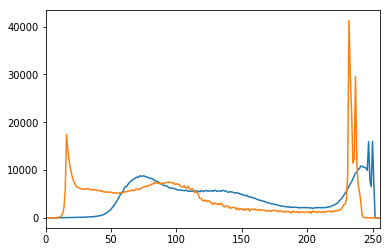

The Bhattacharya Coefficient is 0.84083405328705


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

# to read the two images here and convert to grayscale
img_ = cv2.imread('test__vintage_scrt.jpg') # load an image with the original color on it
img = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY) # convert the color image to gray scale

img2_ = cv2.imread('test_.jpg', 1) # load an image with the original color on it
img2 = cv2.cvtColor(img2_, cv2.COLOR_BGR2GRAY) # convert the color image to gray scale

# initialize two 1D array of size 256 elements for both pictures
array1 = np.zeros((256))
array2 = np.zeros((256))

rows1, columns1 = img.shape # pixel location determined by row x column
rows2, columns2 = img2.shape # pixel location of the second image by row x column

# next two double for loops is to determine the histograms for each picture img and img2
# which are the histograms for vintage and original stored in array1 and array2
for i in range(rows1):
    for j in range(columns1):
        pixel = img[i,j] # obtain the pixel value of that at location i,j
        array1[pixel] += 1 # increment the histogram[pixel] location by 1

for a in range(rows2):
    for b in range(columns2):
        pixel1 = img2[a,b] # obtain the pixel value of that at location a,b
        array2[pixel1] += 1 # increment the histogram[pixel2] location by 1

plt.plot(array1) # using this for testing if my histograms are correct
plt.plot(array2)
plt.xlim([0,256])
plt.show()

# get the total sum of each array1 and array2 separately, we need this
# to do the next step to normalize the histogram
arr_sum1 = int(math.floor(np.sum(array1)))
arr_sum2 = int(math.floor(np.sum(array2)))

# normalize each histogram (i.e. array1 and array2 are histograms, so all the
# values in both arrays now are divided by there total sum therefore obtaining decimals)
for item in range(len(array1)):
    array1[item] = array1[item] / arr_sum1

for items in range(len(array2)):
    array2[items] = array2[items] / arr_sum2

# using the Bhattacharya Coefficient formula to calculate 1 for a match, 0 for not
# a match, but closely resembling each other is a high decimal number
array3 = np.zeros((256)) # use this container to see the sum of array1 and array2
for index in range(256):
    array3[index] = math.sqrt(array1[index] * array2[index])

#b_coefficient = math.floor(np.sum(array3))
b_coefficient = np.sum(array3)
print("The Bhattacharya Coefficient is " + str(b_coefficient))

# 4. Histogram in RGB - Compare original image and result image


The Bhattacharya Coefficient Red is 0.792558132499811
The Bhattacharya Coefficient Green is 0.8385072678731701
The Bhattacharya Coefficient Blue is 0.5719918419784089


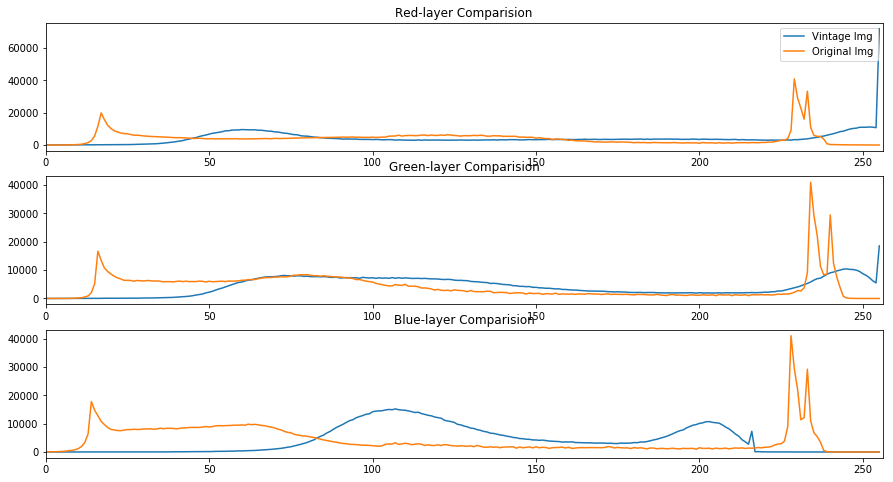

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

# to read the two images here and convert to grayscale
img_ = cv2.imread('test__vintage_scrt.jpg') # load an image with the original color on it
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
img_r = img_[:,:,0]
img_g = img_[:,:,1]
img_b = img_[:,:,2]

img2_ = cv2.imread('test_.jpg', 1) # load an image with the original color on it
img2_ = cv2.cvtColor(img2_, cv2.COLOR_BGR2RGB)
img2_r = img2_[:,:,0]
img2_g = img2_[:,:,1]
img2_b = img2_[:,:,2]

# initialize 6 1D array of size 256 elements for both pictures day and night
array1_r = np.zeros((256))
array1_g = np.zeros((256))
array1_b = np.zeros((256))

array2_r = np.zeros((256))
array2_g = np.zeros((256))
array2_b = np.zeros((256))

rows1_r, columns1_r = img_r.shape
rows1_g, columns1_g = img_g.shape
rows1_b, columns1_b = img_b.shape

rows2_r, columns2_r = img2_r.shape
rows2_g, columns2_g = img2_g.shape
rows2_b, columns2_b = img2_b.shape

for i in range(rows1_r):
    for j in range(columns1_r):
        pixel = img_r[i,j]
        array1_r[pixel] += 1

for i in range(rows1_g):
    for j in range(columns1_g):
        pixel = img_g[i,j]
        array1_g[pixel] += 1
        
for i in range(rows1_b):
    for j in range(columns1_b):
        pixel = img_b[i,j]
        array1_b[pixel] += 1
        
for a in range(rows2_r):
    for b in range(columns2_r):
        pixel1 = img2_r[a,b]
        array2_r[pixel1] += 1
        
for a in range(rows2_g):
    for b in range(columns2_g):
        pixel1 = img2_g[a,b]
        array2_g[pixel1] += 1
        
for a in range(rows2_b):
    for b in range(columns2_b):
        pixel1 = img2_b[a,b]
        array2_b[pixel1] += 1

plt.figure(figsize = (15, 8))
        
#red
plt.subplot(311)
plt.title('Red-layer Comparision')
plt.plot(array1_r)
plt.plot(array2_r)
plt.gca().legend(('Vintage Img','Original Img'))
plt.xlim([0,256])

arr_sum1_r = int(math.floor(np.sum(array1_r)))
arr_sum2_r = int(math.floor(np.sum(array2_r)))

for item in range(len(array1_r)):
    array1_r[item] = array1_r[item] / arr_sum1_r

for items in range(len(array2_r)):
    array2_r[items] = array2_r[items] / arr_sum2_r

array3_r = np.zeros((256))
for index in range(256):
    array3_r[index] = math.sqrt(array1_r[index] * array2_r[index])

b_coefficient_r = np.sum(array3_r)
print("The Bhattacharya Coefficient Red is " + str(b_coefficient_r))

#green
plt.subplot(312)
plt.title('Green-layer Comparision')
plt.plot(array1_g)
plt.plot(array2_g)
plt.xlim([0,256])

arr_sum1_g = int(math.floor(np.sum(array1_g)))
arr_sum2_g = int(math.floor(np.sum(array2_g)))

for item in range(len(array1_g)):
    array1_g[item] = array1_g[item] / arr_sum1_g

for items in range(len(array2_g)):
    array2_g[items] = array2_g[items] / arr_sum2_g

array3_g = np.zeros((256))
for index in range(256):
    array3_g[index] = math.sqrt(array1_g[index] * array2_g[index])

b_coefficient_g = np.sum(array3_g)
print("The Bhattacharya Coefficient Green is " + str(b_coefficient_g))

#blue
plt.subplot(313)
plt.title('Blue-layer Comparision')
plt.plot(array1_b)
plt.plot(array2_b)
plt.xlim([0,256])

arr_sum1_b = int(math.floor(np.sum(array1_b)))
arr_sum2_b = int(math.floor(np.sum(array2_b)))

for item in range(len(array1_b)):
    array1_b[item] = array1_b[item] / arr_sum1_b

for items in range(len(array2_b)):
    array2_b[items] = array2_b[items] / arr_sum2_b

array3_b = np.zeros((256))
for index in range(256):
    array3_b[index] = math.sqrt(array1_b[index] * array2_b[index])

b_coefficient_b = np.sum(array3_b)
print("The Bhattacharya Coefficient Blue is " + str(b_coefficient_b))

plt.show()

# 5. Histogram of Result Image

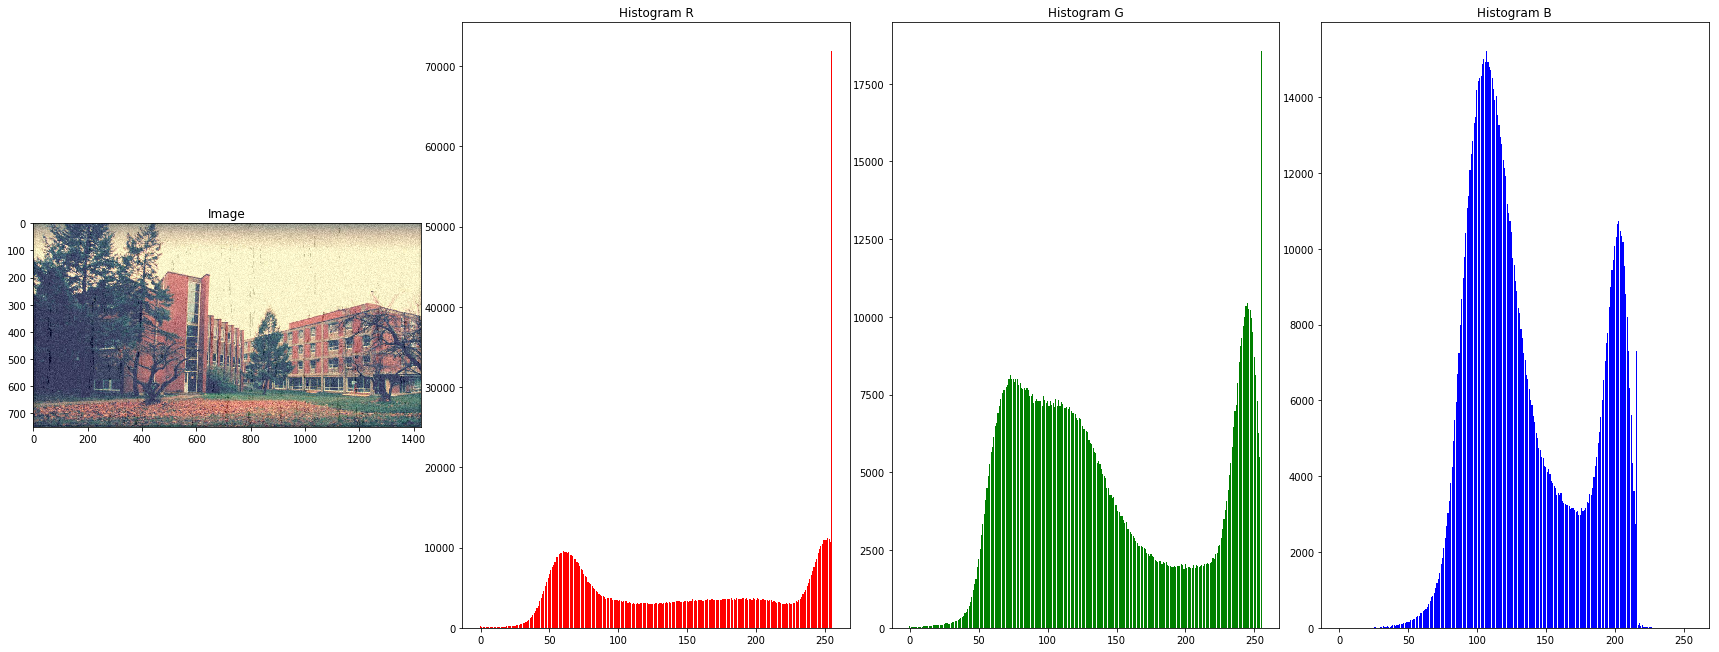

In [22]:
def histogram(img, channel):
    img = img[:, :, channel]
    freq = np.zeros((256,))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            freq[img[i, j]] += 1
    return freq

Original_ = cv2.imread('test__vintage_scrt.jpg')
Original = cv2.cvtColor(Original_, cv2.COLOR_BGR2RGB)

hist_r = histogram(Original, 0)
hist_g = histogram(Original, 1)
hist_b = histogram(Original, 2)

# Show result
f, axarray = plt.subplots(1, 4, figsize = (24,9))
f.tight_layout()
axarray[0].set_title('Image')
axarray[0].imshow(Original)
axarray[1].set_title('Histogram R')
axarray[1].bar(np.arange(256), hist_r, color='r')
axarray[2].set_title('Histogram G')
axarray[2].bar(np.arange(256), hist_g, color='g')  
axarray[3].set_title('Histogram B')
axarray[3].bar(np.arange(256), hist_b, color='b')  
plt.show()

# 6. Histogram of Original Image

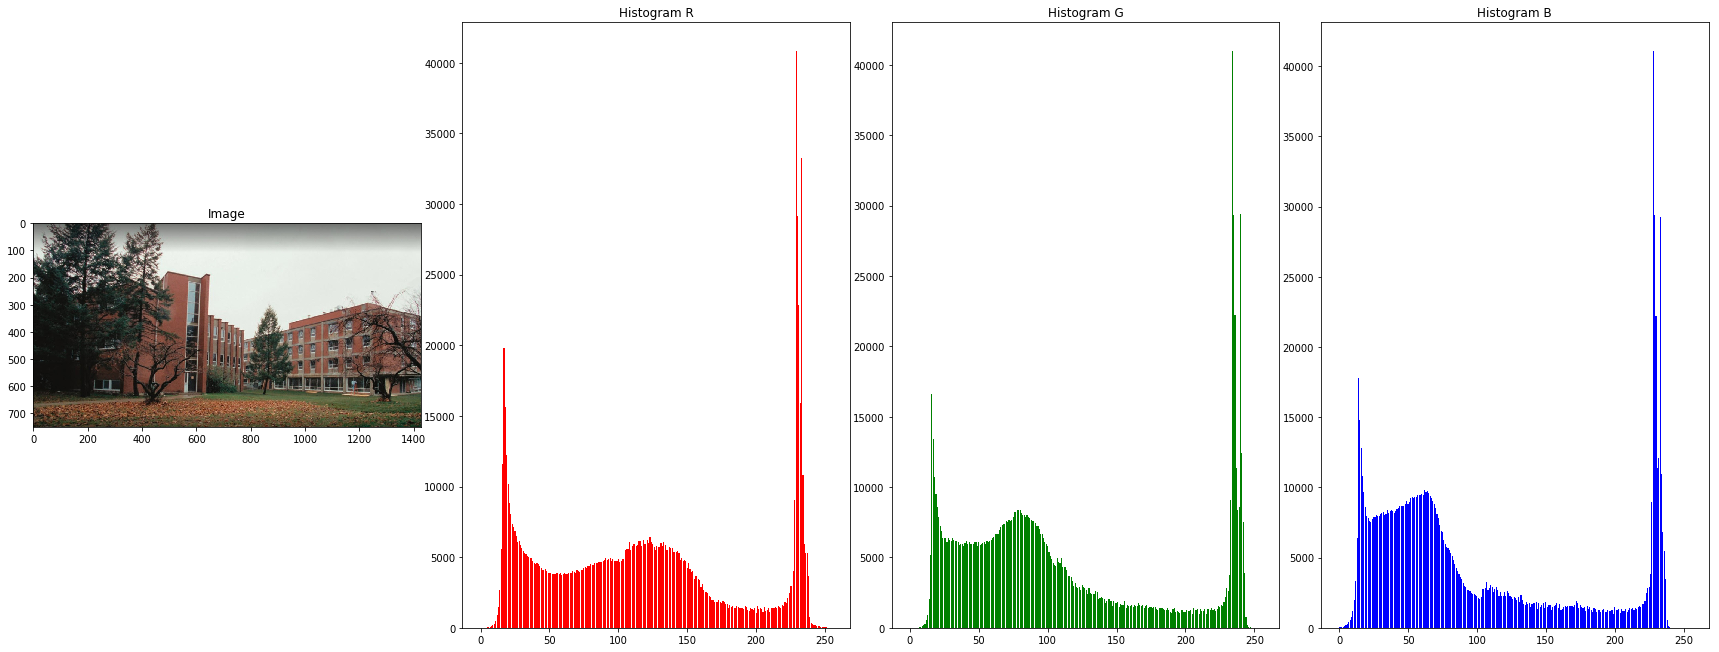

In [90]:
Original_ = cv2.imread('test_.jpg')
Original = cv2.cvtColor(Original_, cv2.COLOR_BGR2RGB)

hist_r = histogram(Original, 0)
hist_g = histogram(Original, 1)
hist_b = histogram(Original, 2)

# Show result
f, axarray = plt.subplots(1, 4, figsize = (24,9))
f.tight_layout()
axarray[0].set_title('Image')
axarray[0].imshow(Original)
axarray[1].set_title('Histogram R')
axarray[1].bar(np.arange(256), hist_r, color='r')
axarray[2].set_title('Histogram G')
axarray[2].bar(np.arange(256), hist_g, color='g')  
axarray[3].set_title('Histogram B')
axarray[3].bar(np.arange(256), hist_b, color='b')  
plt.show()

### Drafts

In [28]:
# scratch_ = cv2.imread('scratch.jpg') #335 x 507
# scratch_ = cv2.cvtColor(scratch_, cv2.COLOR_BGR2RGB)
# scratch = cv2.resize(scratch_, (1426,751))
# plt.imshow(scratch, cmap = 'gray')
# plt.show()
# # print(scratch)

# test_vintage = cv2.imread('test_vintage.jpg')
# test_vintage = cv2.cvtColor(test_vintage, cv2.COLOR_BGR2RGB)

# print(test_vintage.shape)

# x = cv2.addWeighted(test_vintage,0.8,scratch,0.2,0)
# cv2.imwrite('test_vintage_scratch_rgb.jpg',x)
# plt.imshow(x)
# plt.show()